In [2]:
import mglearn
import pandas as pd
import numpy as np

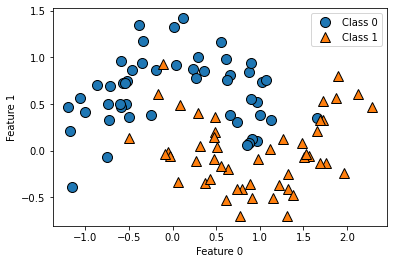

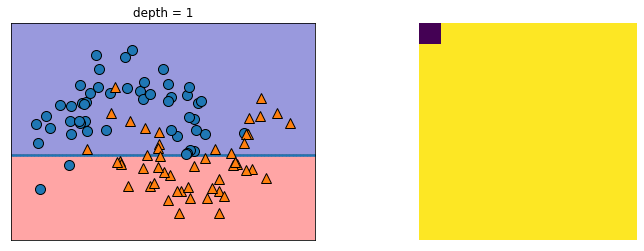

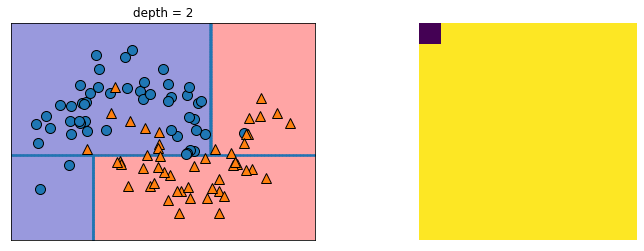

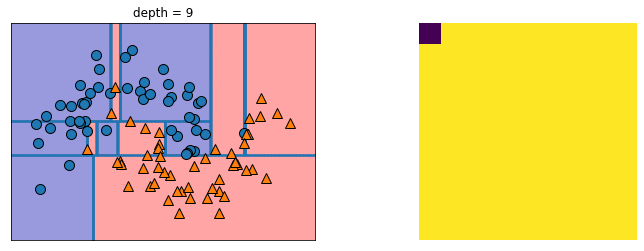

In [3]:
mglearn.plots.plot_tree_progressive()

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [6]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer["data"], cancer["target"], random_state=0)

In [7]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [8]:
# 과대적합 확인
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.8811188811188811


In [50]:
model = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5, random_state=0)

In [51]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9647887323943662
0.9370629370629371


In [40]:
!conda install python-graphviz

^C


In [52]:
from sklearn.tree import export_graphviz
import graphviz

In [53]:
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [54]:
export_graphviz(model, out_file='tree.dot', class_names=['악성','양성'],
               feature_names=cancer.feature_names, impurity=False, filled=True)

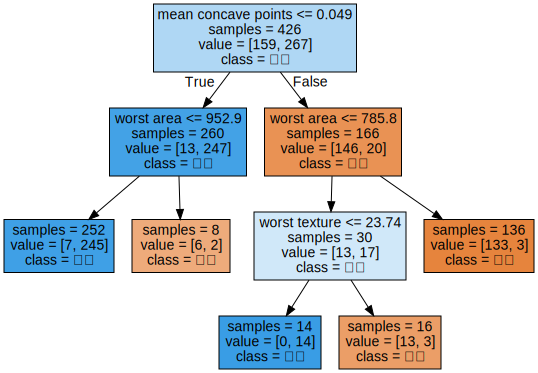

In [55]:
with open('tree.dot', encoding = "utf-8") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))